<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Типы-данных" data-toc-modified-id="Типы-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Типы данных</a></span></li><li><span><a href="#Целевой-признак" data-toc-modified-id="Целевой-признак-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Целевой признак</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Модель-без-преобразования-признаков" data-toc-modified-id="Модель-без-преобразования-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модель без преобразования признаков</a></span></li><li><span><a href="#Модель-с-преобразованием-признаков" data-toc-modified-id="Модель-с-преобразованием-признаков-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Модель с преобразованием признаков</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Шаг 1: Знакомство с данными и обработка  
Шаг 2: Решение задачи кодировки информации при помощи умножения на обратимую матрицу  
Шаг 3: Реализация алгоритма задачи  
Шаг 4: Построение модели  
Шаг 5: Вывод**

## Загрузка данных

In [26]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [27]:
df = pd.read_csv('insurance.csv')

### Знакомство с данными

In [28]:
def df_presentation(df):
    display(df.head())
    print(df.info())
    print(df.shape)
    print(df.describe())
    df.hist(figsize = (12,15))

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
(5000, 5)
               Пол      Возраст      Зарплата  Члены семьи  Страховые выплаты
count  5000.000000  5000.000000   5000.000000  5000.000000        5000.000000
mean      0.499000    30.952800  39916.360000     1.194200           0.148000
std       0.500049     8.440807   9900.083569     1.091387           0.463183
min       0.000000    18.000000   5300.000000     0.000000           0.000000
25%       0.000000    24.000000  33300.000000     0.000000           0.000000
50%       0.000000    3

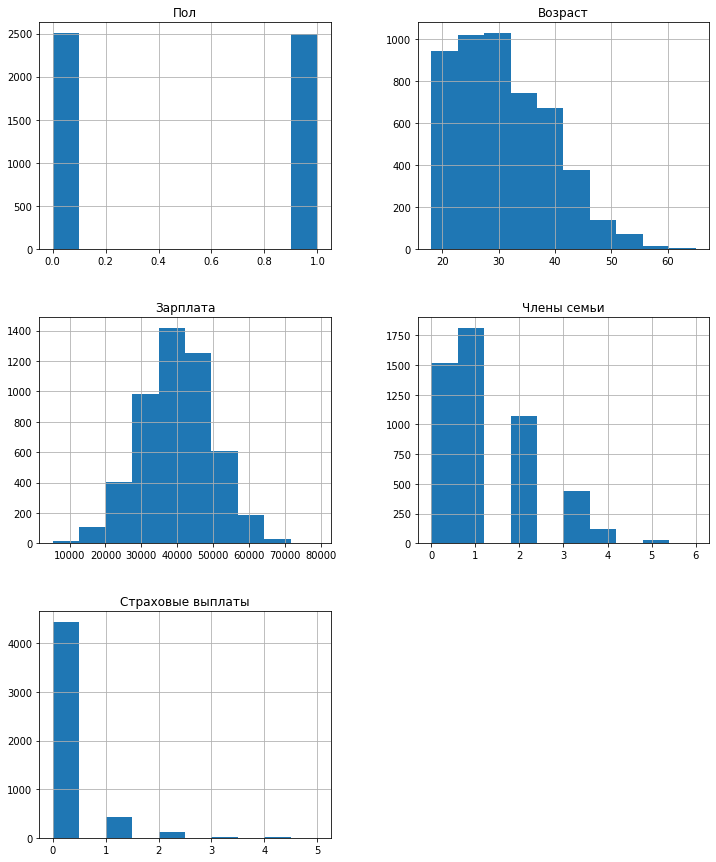

In [29]:
df_presentation(df)

**Мужчин и женщин в выборке примерно поровну  
Средний возраст составляет 30 лет  
Средняя заработная плата варьируется от 35 тыс.руб до 45 тыс.руб  
Количество членов семей чаще всего - 1, либо 0  
Аномалий не наблюдается**

**Построим матрицу корреляции**

In [30]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


**Признаки практически не связаны друг с другом.  
Количество страховых выплат сильно коррелирует с возрастом  
Рассмотрим зависимость наглядно** 

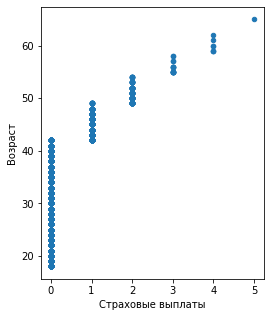

In [31]:
df.plot(x='Страховые выплаты', y='Возраст', kind='scatter', figsize=(4,5))
None

Клиенты возрастом ниже 40 ни разу не получали страховых выплат. Чем больше возраст клиента, тем больше выплат он получил

### Пропуски

In [32]:
# Рассмотрим пропуски в процентах
def isna_view (df):
    return  (
                (df.isna().mean()*100)
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns = {0:'percent_space'})
                .style.background_gradient('coolwarm').format("{:.1f}")
            )

isna_view (df)

,percent_space
Пол,0.0
Возраст,0.0
Зарплата,0.0
Члены семьи,0.0
Страховые выплаты,0.0


**Пропуски отсутствуют**

### Типы данных

**Изменим тип данных столбцов "Возраст" и "Зарплата" на целочисленный**

In [33]:
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')

### Целевой признак

AxesSubplot(0.125,0.125;0.775x0.755)


,Зарплата
Страховые выплаты,
0,4436
1,423
2,115
3,18
4,7
5,1


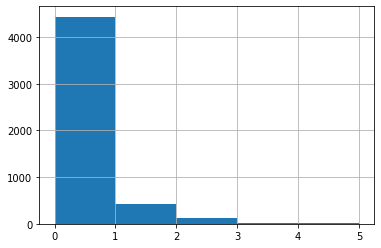

In [34]:
print(df['Страховые выплаты'].hist(bins = 5))

df.pivot_table(index = 'Страховые выплаты', aggfunc={'Зарплата': 'count'})

**Почти 89% клиентов ни разу не получили страховые выплаты за последние 5 лет**

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

In [35]:
features = df.drop(['Страховые выплаты'], axis = 1)
target = df['Страховые выплаты']

**Определим матрицу признаков и вектор целевого признака**

В качестве нулевого столбца выступает столбец из единиц. Тогда сдвиг умножится на вектор $w$ и вектор предсказания можно будет считать по формуле $a = Xw$

Проверим, изменится ли качество линейной регрессии при умножении матрицы признаков на некоторую обратимую матрицу  
Уравнение предсказаний $a = Xw$  
Пусть $Z$ - обратимая матрица, которая может быть умножена на матрицу признаков $X$  
Тогда $F = XZ$  
Уравнение предсказаний $a = Fw$  
$w = (F^TF)^{-1}F^Ty$  
$a = F(F^TF)^{-1}F^Ty$  

Проведем замену $F$ на $XZ$  
$a = XZ((XZ)^T(XZ))^{-1}(XZ)^Ty$ 

Упростим выражение:
$$a = (X∙Z)∙((X∙Z)^T ∙(X∙Z))^{-1}∙(X∙Z)^T∙y = $$  
$$= X∙Z∙((X∙Z)^T∙(X∙Z))^{-1}∙Z^T∙X^T∙y =$$  
$$= X∙Z∙(Z^T∙X^T∙X∙Z)^{-1}∙Z^T∙X^T∙y$$  

Воспользуемся свойством, что $(ABC)^{-1} = C^{-1} B^{-1} A^{-1}$  
В нашем случае $A = Z^T$, $B = X^T X$, $C = Z$  

Получаем выражение:
$$X∙Z∙Z^{-1}∙(X^T∙X)^{-1}∙(Z^T)^{-1}∙Z^T∙X^T∙y$$  

Произведения $Z∙Z^{-1}$ и $(Z^T)^{-1}∙Z^T$ дадут единичные матрицы $E$, которые при умножении на любую матрицу $L$ дадут матрицу $L$  
Тогда:  
$a = X[(X^TX)^{-1}X^Ty]$  

Величина в квадратных скобках равна вектору весов до преобразований  
($w = (X^TX)^{-1}X^Ty$)  
Отсюда следует, что $a = Xw = Fw$, где $F = XZ$  
Качество, соответственно, не изменится

**Ответ:** Качество линейной регрессии при умножении матрицы признаков на некоторую обратимую матрицу не изменится

**Обоснование:** приведено выше

## Алгоритм преобразования

**Алгоритм**

1) Создание матрицы $Z$  
2) Проверка на обратимость  
3) Умножение матрицы признаков $X$ на матрицу $Z$  
4) Расчет коэффициента детерминации $R2$

**Обоснование**

Так как выше было доказано, что путем умножения матрицы признаков на обратимую матрицу данные не изменятся, то для защиты информации будем умножать матрицу признаков $X$ на некую обратимую матрицу $Z$, такую, что произведение этих матриц будет иметь смысл.  
Матрица $F$, равная $XZ$, должна иметь размерность такую же, как матрица признаков $X$, значит, т.к. размерность матрицы $X - (5000,4)$, то количество строк матрицы $Z$ должно быть равно количеству столбцов матрицы $X$, то есть четырем, а количество столбцов матрицы $Z$ должно быть также равно четырем, т.к. получившаяся матрица должна быть такой же размерности, как и $X$  
Отсюда следует, что нужно создать обратимую квадратную матрицу $Z$ размера $(4,4)$  
Квадратная матрица обратима тогда и только тогда, когда она невырожденная  
Квадратная матрица называется невырожденной, если ее определитель не равен нулю

## Проверка алгоритма

### Модель без преобразования признаков

In [36]:
features_train, features_test, target_train, target_test = train_test_split(\
         features, target, test_size = 0.2)

In [37]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
R2_1 = r2_score(target_test, predictions)

print('Качество модели без внедрения технологии преобразования признаков:')
print(R2_1)

Качество модели без внедрения технологии преобразования признаков:
0.4177592071254206


### Модель с преобразованием признаков

Создадим функцию преобразования признаков

In [38]:
def transformation(features):
    # Обозначим матрицу F - конечная матрица преобразованных признаков
    X = features

    # n - количество столбцов матрицы признаков
    n = features.shape[1]
    
    # Создание рандомной квадратной матрицы Z с определенными размерами n*n
    Z = np.random.randint(1, 10, (n,n))
    
    # Посчитаем определитель матрицы Z
    det = np.linalg.det(Z)
    
    # До тех пор, пока определитель не станет отличным от нуля будем генерировать
    # новую матрицу и считать ее определитель
    # Квадратная матрица обратима тогда и только тогда, когда ее определитель отличен от нуля
    while det == 0:
        Z = np.random.randint(1, 10, (n,n))
        det = np.linalg.det(Z)
    
    # Преобразуем признаки путем перемножения матрицы признаков на обратимую матрицу Z
    F = X @ Z
    return F,Z

In [39]:
features_transform, Z = transformation(features)
display(features_transform)
print('-'*40)
print(pd.DataFrame(Z))

,0,1,2,3
0,248291,49975,49815,99461
1,190324,38419,38238,76284
2,105203,21261,21145,42174
3,208651,41899,41821,83542
4,130698,26353,26242,52375
...,...,...,...,...
4995,178700,35962,35856,71584
4996,262240,52711,52578,105012
4997,169644,34090,34016,67936
4998,163662,32914,32836,65563


----------------------------------------
   0  1  2  3
0  2  1  2  7
1  7  9  5  6
2  5  1  1  2
3  2  5  8  8


Данные сильно изменились и по ним вряд ли можно что то понять. Значит, функция справилась с задачей

In [40]:
features_train, features_test, target_train, target_test = train_test_split(\
         features_transform, target, test_size = 0.2)

In [41]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)
R2_2 = r2_score(target_test, predictions)

print('Качество модели c внедрением технологии преобразования признаков:')
print(R2_2)

Качество модели c внедрением технологии преобразования признаков:
0.41016674802971076


**Вывод:**  
- Проведена предобработка данных
- Решена задача по защите информации путем умножения матрицы признаков на обратимую матрицу
- Создан алгоритм на основе данной задачи
- Построено две модели линейной регрессии:  
1) Без технологии защиты информации  
2) С технологией защиты информации  

Так как во втором способе матрица создается путем random.randint качество является не постоянной величиной, но, в целом, коэффициент детерминации не сильно меняется. Плюс такого способа в том, что матрица каждый раз новая и данные клиентов сложнее расшифровать. Минус же в незначительной потере качества.   
Таким образом, можно сделать вывод, что модель с задачей справляется и технология защиты информации работает корректно